# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 11 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams["legend.loc"] = 'best'

## Esercizio 11.1: <span style="color:brown"> Fit lineare </span>
Si vuole utilizzare un singolo neurone (percettrone) per eseguire un fit lineare su un dataset, che rappresenta la seguente funzione:

$$
f(x)=2x+1
$$

Inoltre si vuole stimare come incidono sul training il numero di epoche $N_{epoch}$, la grandezza del dataset $N_{train}$ e il rumore dei dati (noise) $\sigma$.\
Per questa parte si utilizzerà sempre **SGD** come ottimizzatore e **MSE** sia come loss che come metrica.

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

#compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# target parameters of f(x) = m*x + q
m = 2. # slope
q = 1. # intersect

#generate input
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + q # ideal (target) linear function

sigma = 0.25 # noise or standard deviation
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)

In [7]:
perceptron = model.fit(x=x_train, y=y_train, batch_size=25, epochs=40,
                       shuffle=True, validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/40
1000/1000 [==============================] - 0s 181us/sample - loss: 0.6632 - mean_squared_error: 0.6632 - val_loss: 0.3451 - val_mean_squared_error: 0.3451
Epoch 2/40
1000/1000 [==============================] - 0s 71us/sample - loss: 0.2180 - mean_squared_error: 0.2180 - val_loss: 0.1530 - val_mean_squared_error: 0.1530
Epoch 3/40
1000/1000 [==============================] - 0s 70us/sample - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.0997 - val_mean_squared_error: 0.0997
Epoch 4/40
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0837 - mean_squared_error: 0.0837 - val_loss: 0.0786 - val_mean_squared_error: 0.0786
Epoch 5/40
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 6/40
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0663 - mean_squared_error: 0.0663 - 

In [8]:
# return weights
model.get_weights()

[array([[2.0021417]], dtype=float32), array([1.003395], dtype=float32)]

100/100 [==============================] - 0s 101us/sample - loss: 1.2737e-05 - mean_squared_error: 1.2737e-05

Test loss: 1.2737104907500906e-05
Test accuracy: 1.2737105e-05


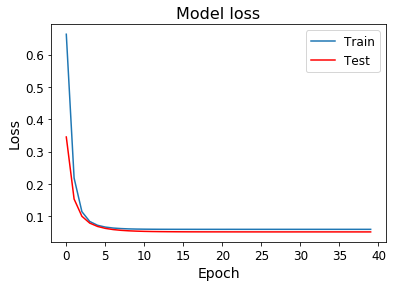

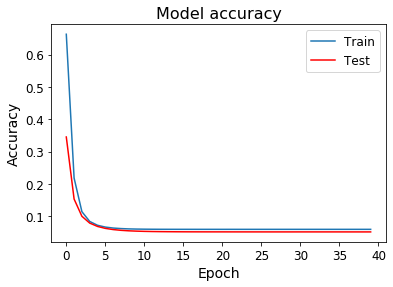

In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=20, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#loss
plt.plot(perceptron.history['loss'])
plt.plot(perceptron.history['val_loss'], color='red')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#MSE
plt.plot(perceptron.history['mean_squared_error'])
plt.plot(perceptron.history['val_mean_squared_error'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

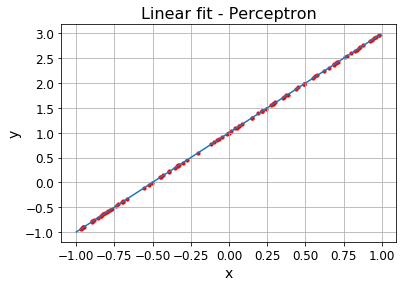

In [11]:
#plot predictions
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r', s=10)
plt.plot(x_valid, y_target)
plt.title('Linear fit - Perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Si vuole capire cosa succede quando si fa variare il numero di epoche $N_{epoch}$ (il primo valore è sempre il coeficiente angolare, il secondo è il termine noto):
Epoch: 20,  Data: 100, Batch: 20, Res: 1.1496575, 0.8168502\
Epoch: 40,  Data: 100, Batch: 20, Res: 1.5589877, 0.9490316\
Epoch: 60,  Data: 100, Batch: 20, Res: 1.7726089, 0.9796087\
Epoch: 80,  Data: 100, Batch: 20, Res: 1.8829459, 0.9902715\
Epoch: 160, Data: 100, Batch: 20, Res: 1.986036, 0.9988623

Si studia cosa succede al variare della grandezza del dataset (i dati di validation sono sempre 10%):\
Epoch: 40, Data: 100, Batch: 25, Res: 1.7163723, 0.9403950\
Epoch: 40, Data: 250, Batch: 25, Res: 1.7161901, 0.9934968\
Epoch: 40, Data: 500, Batch: 25, Res: 1.9905504, 0.9998905\
Epoch: 40, Data: 1000, Batch: 25, Res: 1.999939, 0.9999992

Si studiano le performance all'aumentare dell'incertezza $\sigma$:\
$\sigma$ = 0.1, Epoch: 40, Data: 500, Batch: 25, Res: 1.9996743, 0.9890921\
$\sigma$ = 0.2, Epoch: 40, Data: 500, Batch: 25, Res: 2.0130703, 0.9783435\
$\sigma$ = 0.4, Epoch: 40, Data: 500, Batch: 25, Res: 2.0281737, 0.9567104\
$\sigma$ = 0.6, Epoch: 40, Data: 500, Batch: 25, Res: 2.0598946, 0.9352699\
$\sigma$ = 0.6, Epoch: 40, Data: 10000, Batch: 25, Res: 1.9913285, 1.0132692

Si può concludere che per ottenere un buon fit è necessario far allenare la rete per un numero di epoche abbastanza grande (in dipendenza anche dall'errore e dalla grandezza del dataset), bisogna avere un set di dati grande e il rumore sui dati non deve essere troppo marcato.

L'esempio di fit lineare riportato sopra è stato eseguito con le seguenti grandezze: $\sigma = 0.25$, $N_{train} = 1000$ e $N_{epoch} = 40$.

## Esercizio 11.2: <span style="color:brown"> Fit polinomiale </span>
Si vuole estendere la rete neurale precedentemente creata per eseguire un fit sul polinomio, per $x \in [-1,1]$:

$$
f(x)=4-3x-2x^2+3x^3
$$

Nel corso dell'esercizio si utilizzeranno diverse configurazioni per la rete neurale, facendo variare i seguenti parametri:
* numero di layers
* numero di neuroni per layer
* funzioni di attivazione
* ottimizzatori
* funzioni di loss

Questo permetterà di capire quale tipo di rete e quali parametri sono migliori per fare il fit della funzione $f(x)$.

In [12]:
#generic polynomial of order 3
def pol_3(x, c0, c1, c2, c3):
    
    return c0 + c1*x + c2*(x**2) + c3*(x**3)

#parameters: f(x) = a + b*x + c*x^2 + d*x^3
a = 4.
b = -3.
c = -2.
d = 3.

#generate input
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 20000)
x_valid = np.random.uniform(-1, 1, 2000)
x_valid.sort()
y_target = pol_3(x_valid, a, b, c, d)    #ideal (target) function

sigma = 0.3 # noise or standard deviation
y_train = np.random.normal(pol_3(x_train, a, b, c, d), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(pol_3(x_valid, a, b, c, d), sigma)

### Test sul numero di layers 
Per capire come i risultati del fit dipendono dal numero di layer della rete si utilizzano 3 modelli con un numero variabile di layer (2, 3, 4), oltre all'input e all'output, e si analizzano i risultati.

In [13]:
#model with 2 layers
model_2l = Sequential()
model_2l.add(Dense(6, input_shape=(1,), activation='relu'))
model_2l.add(Dense(6, activation='relu'))
model_2l.add(Dense(1, activation='elu'))

#compile the model
model_2l.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_2l.summary()

history_2l = model_2l.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 41us/sample - loss: 0.6584 - mean_squared_error: 0.6584 - val_loss: 1.1909 - val_mean_squared_error: 1.1909
Epoch 2/40
20000/20000 [==============================] - 1s 34us/sample - loss: 0.2586 - mean_squared_error: 0.2586 - val_loss: 0.7818 - val_mean_squared_error: 0.7818
E

In [14]:
#mooel with 3 layers
model_3l = Sequential()
model_3l.add(Dense(6, input_shape=(1,), activation='relu'))
model_3l.add(Dense(6, activation='relu'))
model_3l.add(Dense(6, activation='relu'))
model_3l.add(Dense(1, activation='elu'))

#compile the model
model_3l.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_3l.summary()

history_3l = model_3l.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 44us/sample - loss: 1.5378 - mean_squared_error: 1.5378 - val_loss: 1.0680 - val_mean_squared_error: 1.0680
Epoch 2/40
20000/20000 [============

In [15]:
#model with 4 layers
model_4l = Sequential()
model_4l.add(Dense(6, input_shape=(1,), activation='relu'))
model_4l.add(Dense(6, activation='relu'))
model_4l.add(Dense(6, activation='relu'))
model_4l.add(Dense(6, activation='relu'))
model_4l.add(Dense(1, activation='elu'))

#compile the model
model_4l.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_4l.summary()

history_4l = model_4l.fit(x=x_train, y=y_train, batch_size=50, epochs=50,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 1s 48us/sample 

20000/20000 [==============================] - 1s 35us/sample - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.2127 - val_mean_squared_error: 0.2127
Epoch 44/50
20000/20000 [==============================] - 1s 35us/sample - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.2154 - val_mean_squared_error: 0.2154
Epoch 45/50
20000/20000 [==============================] - 1s 37us/sample - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.2126 - val_mean_squared_error: 0.2126
Epoch 46/50
20000/20000 [==============================] - 1s 34us/sample - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.2111 - val_mean_squared_error: 0.2111
Epoch 47/50
20000/20000 [==============================] - 1s 36us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.2129 - val_mean_squared_error: 0.2129
Epoch 48/50
20000/20000 [==============================] - 1s 38us/sample - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.2116 - val_mean_squared_error:

In [16]:
#evaluate models with the exact curve
score_2l = model_2l.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_3l = model_3l.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_4l = model_4l.evaluate(x_valid, y_target, batch_size=50, verbose=1)

#print performance
print()
print('Test loss (2 layers):', score_2l[0])
print('Test accuracy (2 layers):', score_2l[1])
print()
print('Test loss (3 layers):', score_3l[0])
print('Test accuracy (3 layers):', score_3l[1])
print()
print('Test loss (4 layers):', score_4l[0])
print('Test accuracy (4 layers):', score_4l[1])

2000/2000 [==============================] - 0s 25us/sample - loss: 0.1178 - mean_squared_error: 0.1178

Test loss (2 layers): 0.21236236856802862
Test accuracy (2 layers): 0.21236235

Test loss (3 layers): 0.10087974776856753
Test accuracy (3 layers): 0.10087974

Test loss (4 layers): 0.11776952646715699
Test accuracy (4 layers): 0.11776952


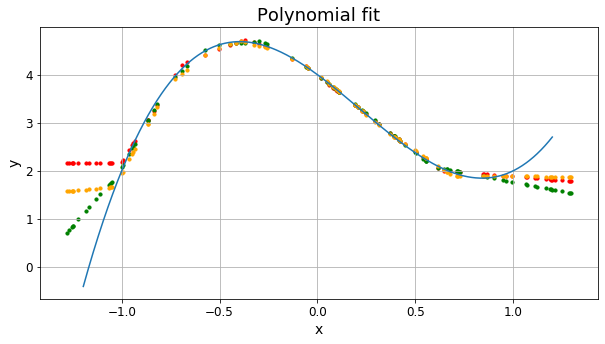

In [21]:
#predictions
x_predicted = np.random.uniform(-1.3, 1.3, 100)
y_predicted_2l = model_2l.predict(x_predicted)
y_predicted_3l = model_3l.predict(x_predicted)
y_predicted_4l = model_4l.predict(x_predicted)

fig = plt.figure(figsize=(10,5))
plt.scatter(x_predicted, y_predicted_2l, color='r', s=10)
plt.scatter(x_predicted, y_predicted_3l, color='g', s=10)
plt.scatter(x_predicted, y_predicted_4l, color='orange', s=10)
plt.plot(x_valid, y_target)
plt.title('Polynomial fit', size=18)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Test sul numero di neuroni per layer
Per capire come il numero di neuroni per ogni layer incide sul fit si utilizzerà una rete con 2 layer e con un numero di neuroni variabile (10, 15, 20).

In [22]:
#10 neurons per layer
model_10 = Sequential()
model_10.add(Dense(10, input_shape=(1,), activation='relu'))
model_10.add(Dense(10, input_shape=(1,), activation='relu'))
model_10.add(Dense(1, activation='elu'))

#compile the model
model_10.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_10.summary()

history_10 = model_10.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))                     

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 47us/sample - loss: 0.8194 - mean_squared_error: 0.8194 - val_loss: 1.2478 - val_mean_squared_error: 1.2478
Epoch 2/40
20000/20000 [==============================] - 1s 33us/sample - loss: 0.2468 - mean_squared_error: 0.2468 - val_loss: 0.6667 - val_mean_squared_error: 0.6667

In [23]:
#15 neurons per layer
model_15 = Sequential()
model_15.add(Dense(15, input_shape=(1,), activation='relu'))
model_15.add(Dense(15, input_shape=(1,), activation='relu'))
model_15.add(Dense(1, activation='elu'))

#compile the model
model_15.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_15.summary()

history_15 = model_15.fit(x=x_train, y=y_train, batch_size=50, epochs=45,
                          shuffle=True, validation_data=(x_valid, y_valid)) 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_18 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/45
20000/20000 [==============================] - 1s 46us/sample - loss: 0.8445 - mean_squared_error: 0.8445 - val_loss: 0.9737 - val_mean_squared_error: 0.9737
Epoch 2/45
20000/20000 [==============================] - 1s 35us/sample - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.5698 - val_mean_squared_error: 0.5698

20000/20000 [==============================] - 1s 34us/sample - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.1957 - val_mean_squared_error: 0.1957
Epoch 45/45
20000/20000 [==============================] - 1s 33us/sample - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1948 - val_mean_squared_error: 0.1948


In [24]:
#20 neurons per layer
model_20 = Sequential()
model_20.add(Dense(20, input_shape=(1,), activation='relu'))
model_20.add(Dense(20, input_shape=(1,), activation='relu'))
model_20.add(Dense(1, activation='elu'))

#compile the model
model_20.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_20.summary()

history_20 = model_20.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid)) 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_21 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 51us/sample - loss: 0.7612 - mean_squared_error: 0.7612 - val_loss: 0.8562 - val_mean_squared_error: 0.8562
Epoch 2/40
20000/20000 [==============================] - 1s 33us/sample - loss: 0.1664 - mean_squared_error: 0.1664 - val_loss: 0.5324 - val_mean_squared_error: 0.5324

2000/2000 [==============================] - 0s 20us/sample - loss: 0.0962 - mean_squared_error: 0.0962

Test loss (10 neurons): 0.06021391846206825
Test accuracy (10 neurons): 0.060213927

Test loss (15 neurons): 0.09914463413660997
Test accuracy (15 neurons): 0.09914464

Test loss (20 neurons): 0.09621754909937863
Test accuracy (20 neurons): 0.09621756


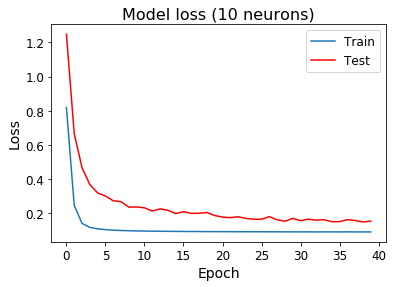

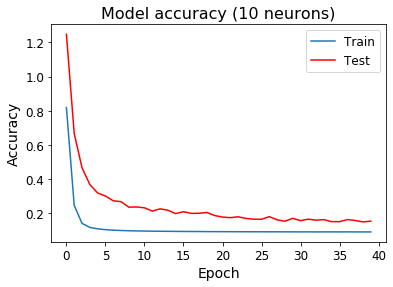

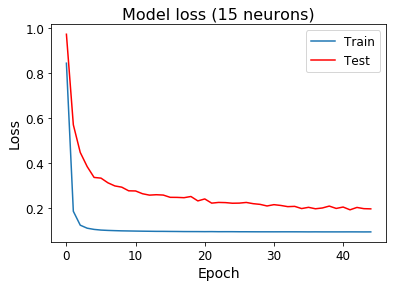

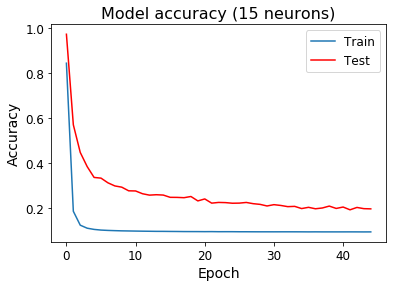

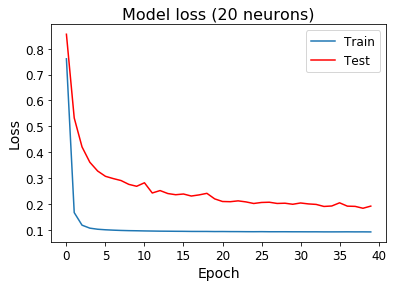

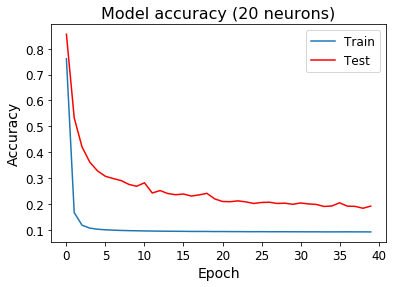

In [25]:
#evaluate models with the exact curve
score_10 = model_10.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_15 = model_15.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_20 = model_20.evaluate(x_valid, y_target, batch_size=50, verbose=1)

#print performance
print()
print('Test loss (10 neurons):', score_10[0])
print('Test accuracy (10 neurons):', score_10[1])
print()
print('Test loss (15 neurons):', score_15[0])
print('Test accuracy (15 neurons):', score_15[1])
print()
print('Test loss (20 neurons):', score_20[0])
print('Test accuracy (20 neurons):', score_20[1])

#10 neuronds
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'], color='red')
plt.title('Model loss (10 neurons)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history_10.history['mean_squared_error'])
plt.plot(history_10.history['val_mean_squared_error'], color='red')
plt.title('Model accuracy (10 neurons)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#15 neurons
plt.plot(history_15.history['loss'])
plt.plot(history_15.history['val_loss'], color='red')
plt.title('Model loss (15 neurons)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history_15.history['mean_squared_error'])
plt.plot(history_15.history['val_mean_squared_error'], color='red')
plt.title('Model accuracy (15 neurons)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#20 neurons
plt.plot(history_20.history['loss'])
plt.plot(history_20.history['val_loss'], color='red')
plt.title('Model loss (20 neurons)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history_20.history['mean_squared_error'])
plt.plot(history_20.history['val_mean_squared_error'], color='red')
plt.title('Model accuracy (20 neurons)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

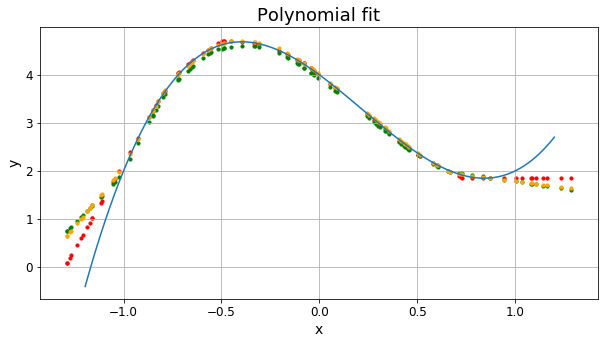

In [27]:
#predictions
x_predicted = np.random.uniform(-1.3, 1.3, 100)
y_predicted_10 = model_10.predict(x_predicted)
y_predicted_15 = model_15.predict(x_predicted)
y_predicted_20 = model_20.predict(x_predicted)

fig = plt.figure(figsize=(10,5))
plt.scatter(x_predicted, y_predicted_10, color='r', s=10)
plt.scatter(x_predicted, y_predicted_15, color='g', s=10)
plt.scatter(x_predicted, y_predicted_20, color='orange', s=10)
plt.plot(x_valid, y_target)
plt.title('Polynomial fit', size=18)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Test sulle funzioni di attivazione
Si sceglie il modello a 3 layer e si cambiano alcune funzioni di attivazione per poter studiare come il modello dipende da esse.

In [30]:
model_relu = Sequential()
model_relu.add(Dense(6, input_shape=(1,), activation='relu'))
model_relu.add(Dense(6, activation='relu'))
model_relu.add(Dense(6, activation='relu'))
model_relu.add(Dense(1, activation='elu'))

#compile the model
model_relu.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_relu.summary()

history_relu = model_relu.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_32 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_33 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 53us/sample - loss: 0.8698 - mean_squared_error: 0.8698 - val_loss: 1.3363 - val_mean_squared_error: 1.3363
Epoch 2/40
20000/20000 [===========

In [31]:
model_sigm = Sequential()
model_sigm.add(Dense(6, input_shape=(1,), activation='relu'))
model_sigm.add(Dense(6, activation='relu'))
model_sigm.add(Dense(6, activation='relu'))
model_sigm.add(Dense(1, activation='sigmoid'))

#compile the model
model_sigm.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_sigm.summary()

history_sigm = model_sigm.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_36 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 53us/sample - loss: 7.1188 - mean_squared_error: 7.1188 - val_loss: 5.6288 - val_mean_squared_error: 5.6288
Epoch 2/40
20000/20000 [===========

In [32]:
model_relu2 = Sequential()
model_relu2.add(Dense(6, input_shape=(1,), activation='relu'))
model_relu2.add(Dense(6, activation='sigmoid'))
model_relu2.add(Dense(6, activation='sigmoid'))
model_relu2.add(Dense(1, activation='relu'))

#compile the model
model_relu2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_relu2.summary()

history_relu2 = model_relu2.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_40 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_41 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 56us/sample - loss: 1.2146 - mean_squared_error: 1.2146 - val_loss: 1.4350 - val_mean_squared_error: 1.4350
Epoch 2/40
20000/20000 [===========

In [33]:
model_sp = Sequential()
model_sp.add(Dense(6, input_shape=(1,), activation='relu'))
model_sp.add(Dense(6, activation='softplus'))
model_sp.add(Dense(6, activation='softplus'))
model_sp.add(Dense(1, activation='softplus'))

#compile the model
model_sp.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_sp.summary()

history_sp = model_sp.fit(x=x_train, y=y_train, batch_size=50, epochs=40,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_44 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 58us/sample - loss: 0.6534 - mean_squared_error: 0.6534 - val_loss: 1.3287 - val_mean_squared_error: 1.3287
Epoch 2/40
20000/20000 [===========

In [34]:
#evaluate models with the exact curve
score_relu = model_relu.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_sigm = model_sigm.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_relu2 = model_relu2.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_sp = model_sp.evaluate(x_valid, y_target, batch_size=50, verbose=1)

#print performance
print()
print('Test loss (relu activation):', score_relu[0])
print('Test accuracy (relu activation):', score_relu[1])
print()
print('Test loss (sigmoid activation):', score_sigm[0])
print('Test accuracy (sigmoid activation):', score_sigm[1])
print()
print('Test loss (sigmoid + relu):', score_relu2[0])
print('Test accuracy (sigmoid + relu):', score_relu2[1])
print()
print('Test loss (softplus):', score_sp[0])
print('Test accuracy (softplus):', score_sp[1])

2000/2000 [==============================] - 0s 26us/sample - loss: 0.2550 - mean_squared_error: 0.2550

Test loss (relu activation): 0.21380028400926676
Test accuracy (relu activation): 0.2138003

Test loss (sigmoid activation): 5.462878502905369
Test accuracy (sigmoid activation): 5.4628797

Test loss (sigmoid + relu): 0.20287262106248818
Test accuracy (sigmoid + relu): 0.20287266

Test loss (softplus): 0.2549582510251639
Test accuracy (softplus): 0.25495827


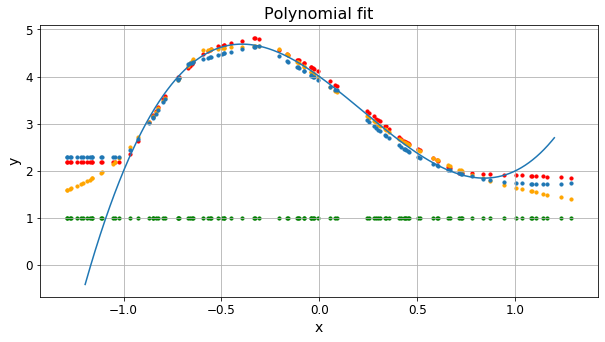

In [35]:
#predictions  -AGGIUNGI LE LABEL DI TUTTE
y_predicted_relu = model_relu.predict(x_predicted)
y_predicted_sigm = model_sigm.predict(x_predicted)
y_predicted_relu2 = model_relu2.predict(x_predicted)
y_predicted_sp = model_sp.predict(x_predicted)

fig = plt.figure(figsize=(10,5))
plt.scatter(x_predicted, y_predicted_relu, color='r', s=10)
plt.scatter(x_predicted, y_predicted_sigm, color='g', s=10)
plt.scatter(x_predicted, y_predicted_relu2, color='orange', s=10)
plt.scatter(x_predicted, y_predicted_sp, s=10)
plt.plot(x_valid, y_target)
plt.title('Polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Si osserva come le funzioni di attivazione che vengono usate per i neuroni interni non sono troppo impotanti (caso relu + sigmoide), ma devono essere scelte con cura la funzione di attivazione del primo layer e quella dell'ultimo, perhcè possono pregiudicare l'intero fit.

### Test ottimizzatori
Si analizzano diversi tipi di ottimizzatori per capire come essi influiscono sulle performance del training e sul risultato del fit.

In [44]:
model_adagrad = Sequential()
model_adagrad.add(Dense(6, input_shape=(1,), activation='relu'))
model_adagrad.add(Dense(6, activation='relu'))
model_adagrad.add(Dense(6, activation='relu'))
model_adagrad.add(Dense(1, activation='elu'))

#compile the model
model_adagrad.compile(optimizer=keras.optimizers.Adagrad(learning_rate=0.005),
                      loss='mse', metrics=['mse'])

model_adagrad.summary()

history_adagrad = model_adagrad.fit(x=x_train, y=y_train, batch_size=50, epochs=50,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_65 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 1s 73us/sample - loss: 9.6023 - mean_squared_error: 9.6023 - val_loss: 5.4087 - val_mean_squared_error: 5.4087
Epoch 2/50
20000/20000 [===========

Epoch 44/50
20000/20000 [==============================] - 1s 47us/sample - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.3392 - val_mean_squared_error: 0.3392
Epoch 45/50
20000/20000 [==============================] - 1s 50us/sample - loss: 0.0993 - mean_squared_error: 0.0993 - val_loss: 0.3343 - val_mean_squared_error: 0.3343
Epoch 46/50
20000/20000 [==============================] - 1s 45us/sample - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.3317 - val_mean_squared_error: 0.3317
Epoch 47/50
20000/20000 [==============================] - 1s 43us/sample - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.3275 - val_mean_squared_error: 0.3275
Epoch 48/50
20000/20000 [==============================] - 1s 43us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.3299 - val_mean_squared_error: 0.3299
Epoch 49/50
20000/20000 [==============================] - 1s 42us/sample - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.3285 - val_mean_sq

In [38]:
model_adam = Sequential()
model_adam.add(Dense(6, input_shape=(1,), activation='elu'))
model_adam.add(Dense(6, activation='relu'))
model_adam.add(Dense(6, activation='relu'))
model_adam.add(Dense(1, activation='elu'))

#compile the model
model_adam.compile(optimizer=keras.optimizers.Adam(),
                       loss='mse', metrics=['mse'])

model_adam.summary()

history_adam = model_adam.fit(x=x_train, y=y_train, batch_size=50, epochs=30,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_56 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_57 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/30
20000/20000 [==============================] - 1s 75us/sample - loss: 4.4978 - mean_squared_error: 4.4978 - val_loss: 1.0057 - val_mean_squared_error: 1.0057
Epoch 2/30
20000/20000 [===========

In [45]:
#evaluate models with the exact curve
score_adagrad = model_adagrad.evaluate(x_valid, y_target, batch_size=50, verbose=1)
score_adam = model_adam.evaluate(x_valid, y_target, batch_size=50, verbose=1)

#print performance
print()
print('Test loss (adagrad optimizer):', score_adagrad[0])
print('Test accuracy (adagrad optimizer):', score_adagrad[1])
print()
print('Test loss (adam optimizer):', score_adam[0])
print('Test accuracy (adam optimizer):', score_adam[1])

2000/2000 [==============================] - 0s 26us/sample - loss: 0.2037 - mean_squared_error: 0.2037

Test loss (adagrad optimizer): 0.22990754649040354
Test accuracy (adagrad optimizer): 0.2299075

Test loss (adam optimizer): 0.20365145253454103
Test accuracy (adam optimizer): 0.20365149


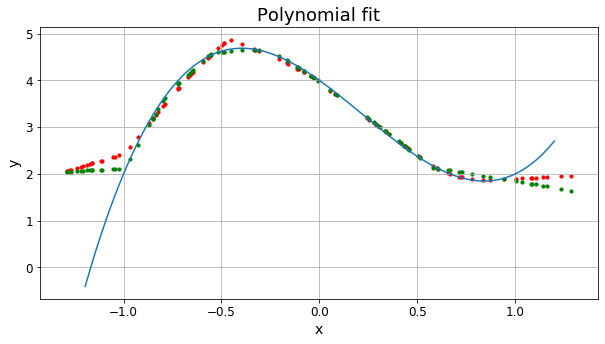

In [46]:
#predictions
y_predicted_adagrad = model_adagrad.predict(x_predicted)
y_predicted_adam = model_adam.predict(x_predicted)

fig = plt.figure(figsize=(10,5))
plt.scatter(x_predicted, y_predicted_adagrad, color='r', s=10)
plt.scatter(x_predicted, y_predicted_adam, color='g', s=10)
plt.plot(x_valid, y_target)
plt.title('Polynomial fit', size=18)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Si nota come il fit cambia a seconda dell'ottimizzatore utilizzato; in particolare in questo caso è molto migliore il fit che si ottiene con *Adam* (o *SGD*), rispetto a quello che si ottiene con *Adagrad*. 

### Test sulle funzioni di loss
Si confrontano i risutati precedenti con quelli che si ottengono con altre funzioni di loss, a parità degli altri parametri del modello.

In [47]:
model_mae = Sequential()
model_mae.add(Dense(6, input_shape=(1,), activation='elu'))
model_mae.add(Dense(6, activation='relu'))
model_mae.add(Dense(6, activation='relu'))
model_mae.add(Dense(1, activation='elu'))

#compile the model
model_mae.compile(optimizer=keras.optimizers.SGD(), loss='mae', metrics=['mse'])

model_mae.summary()

history_mae = model_mae.fit(x=x_train, y=y_train, batch_size=50, epochs=50,
                          shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_68 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_69 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 2000 samples
Epoch 1/50
20000/20000 [==============================] - 1s 72us/sample - loss: 0.8952 - mean_squared_error: 1.7165 - val_loss: 0.8680 - val_mean_squared_error: 2.1790
Epoch 2/50
20000/20000 [===========

Epoch 44/50
20000/20000 [==============================] - 1s 41us/sample - loss: 0.2439 - mean_squared_error: 0.0940 - val_loss: 0.3238 - val_mean_squared_error: 0.2271
Epoch 45/50
20000/20000 [==============================] - 1s 40us/sample - loss: 0.2441 - mean_squared_error: 0.0943 - val_loss: 0.3291 - val_mean_squared_error: 0.2318
Epoch 46/50
20000/20000 [==============================] - 1s 41us/sample - loss: 0.2445 - mean_squared_error: 0.0943 - val_loss: 0.3361 - val_mean_squared_error: 0.2415
Epoch 47/50
20000/20000 [==============================] - 1s 41us/sample - loss: 0.2434 - mean_squared_error: 0.0936 - val_loss: 0.3290 - val_mean_squared_error: 0.2314
Epoch 48/50
20000/20000 [==============================] - 1s 40us/sample - loss: 0.2446 - mean_squared_error: 0.0944 - val_loss: 0.3325 - val_mean_squared_error: 0.2351
Epoch 49/50
20000/20000 [==============================] - 1s 45us/sample - loss: 0.2444 - mean_squared_error: 0.0945 - val_loss: 0.3320 - val_mean_sq

2000/2000 [==============================] - 0s 25us/sample - loss: 0.1529 - mean_squared_error: 0.1411

Test loss (MAE loss): 0.15293552483199163
Test accuracy (MAE loss): 0.14114493


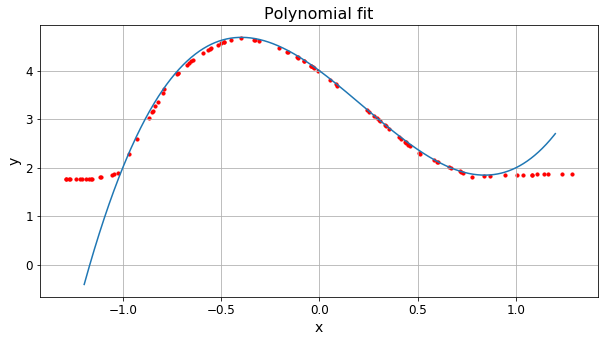

In [48]:
#evaluate models with the exact curve
score_mae = model_mae.evaluate(x_valid, y_target, batch_size=50, verbose=1)
y_predicted_mae = model_mae.predict(x_predicted)

#print performance
print()
print('Test loss (MAE loss):', score_mae[0])
print('Test accuracy (MAE loss):', score_mae[1])

fig = plt.figure(figsize=(10,5))
plt.scatter(x_predicted, y_predicted_mae, color='r', s=10)
plt.plot(x_valid, y_target)
plt.title('Polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In questo esercizio si è visto che le performance di una rete neurale dipendono fortemente da come viene costruita la rete, ma anche dal modo in cui è eseguito il training (vedi esempio degli ottimizzatori). Questo fa si che una rete con troppo pochi parametri non possa eseguire un fit corretto su funzioni complicate (per esempio con molti massimi e minimi oppure funzioni che variano molto velocemente). Inoltre è importante la scelta delle funzioni di attivazione dei vari layers, soprattutto del primo e dell'ultimo; per esempio si può vedere il caso della sigmoide.\
Dai risultati riportati nelle sezioni precedenti, si osserva che nessuna rete riesce a riprodurre il comportamento della funzione al di fuori dell'intervallo in cui è stato eseguito il training: questo è un comportamneto atteso, perchè i parametri della rete sono ottimizzati per riprodurre il comportamento della funzione nell'intervallo in cui  allenata e non all'esterno. Si vede come al di fuori dell'intervallo, i valori predetti dalla rete tendono a rimanere costanti.

## Esercizio 11.3: <span style="color:brown"> Fit di una funzione trigonometrica 2D </span>
Si vogliono estendere tutte le considerazioni fatte nei punti precedenti ad una funzione trigonometrica di due variabili:

$$
f(x,y) = \sin(x^2+y^2)
$$

negli intervalli $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [57]:
#generate input
N_train = 20000
N_valid = 2000

x_train = np.random.uniform(-3/2, 3/2, N_train)
y_train = np.random.uniform(-3/2, 3/2, N_train)

x_valid = np.random.uniform(-3/2, 3/2, N_valid)
y_valid = np.random.uniform(-3/2, 3/2, N_valid)
x_valid.sort()
y_valid.sort()

z_target = np.sin(x_valid**2 + y_valid**2)    #ideal (target) function

sigma = 0.25 # noise or standard deviation
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

In [58]:
#create new model
model_sin = Sequential()
model_sin.add(Dense(10, input_shape=(2,), activation='tanh'))
model_sin.add(Dense(20, activation='tanh'))
model_sin.add(Dense(20, activation='tanh'))
model_sin.add(Dense(1, activation='linear'))

#compile the model
model_sin.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#return a summary for NN
model_sin.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_76 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_77 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 21        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [59]:
#prepare input
xx = np.array([x_train, y_train])
x1 = xx.transpose()

xx_valid = np.array([x_valid,y_valid])
xx_valid = xx_valid.transpose()

#fit the model
fit_sin = model_sin.fit(x=x1, y=z_train, batch_size=100, epochs=110,
                          shuffle=True, validation_data=(xx_valid, z_valid))

Train on 20000 samples, validate on 2000 samples
Epoch 1/110
20000/20000 [==============================] - 1s 55us/sample - loss: 0.2289 - mean_squared_error: 0.2289 - val_loss: 0.4344 - val_mean_squared_error: 0.4344
Epoch 2/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.2116 - mean_squared_error: 0.2116 - val_loss: 0.4173 - val_mean_squared_error: 0.4173
Epoch 3/110
20000/20000 [==============================] - 0s 23us/sample - loss: 0.2107 - mean_squared_error: 0.2107 - val_loss: 0.4159 - val_mean_squared_error: 0.4159
Epoch 4/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.2097 - mean_squared_error: 0.2097 - val_loss: 0.4137 - val_mean_squared_error: 0.4137
Epoch 5/110
20000/20000 [==============================] - 0s 23us/sample - loss: 0.2087 - mean_squared_error: 0.2087 - val_loss: 0.4052 - val_mean_squared_error: 0.4052
Epoch 6/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.2077 - mean_squar

Epoch 49/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1849 - val_mean_squared_error: 0.1849
Epoch 50/110
20000/20000 [==============================] - 0s 23us/sample - loss: 0.1216 - mean_squared_error: 0.1216 - val_loss: 0.1813 - val_mean_squared_error: 0.1813
Epoch 51/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.1207 - mean_squared_error: 0.1207 - val_loss: 0.1775 - val_mean_squared_error: 0.1775
Epoch 52/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.1199 - mean_squared_error: 0.1199 - val_loss: 0.1777 - val_mean_squared_error: 0.1777
Epoch 53/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.1191 - mean_squared_error: 0.1191 - val_loss: 0.1706 - val_mean_squared_error: 0.1706
Epoch 54/110
20000/20000 [==============================] - 0s 23us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - val_loss: 0.1703 - val_m

Epoch 97/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 98/110
20000/20000 [==============================] - 0s 21us/sample - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0717 - val_mean_squared_error: 0.0717
Epoch 99/110
20000/20000 [==============================] - ETA: 0s - loss: 0.0734 - mean_squared_error: 0.07 - 0s 22us/sample - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 100/110
20000/20000 [==============================] - 0s 23us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 101/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0707 - val_mean_squared_error: 0.0707
Epoch 102/110
20000/20000 [==============================] - 0s 22us/sample - loss: 0.0719 

In [60]:
#predictions
x_predicted = np.random.uniform(-3/2, 3/2, 10000)
y_predicted = np.random.uniform(-3/2, 3/2, 10000)
xy = np.array([x_predicted, y_predicted]).transpose()
z_predicted = np.array(model_sin.predict(xy))

xyz = np.zeros((len(x_predicted), 3))
xyz.shape
for i in range(len(x_predicted)):
    xyz[i, 0] = x_predicted[i]
    xyz[i, 1] = y_predicted[i]
    xyz[i, 2] = z_predicted[i]

2000/2000 [==============================] - 0s 15us/sample - loss: 0.5725 - mean_squared_error: 0.5725

Test loss: 0.5725388579070568
Test accuracy: 0.57253885


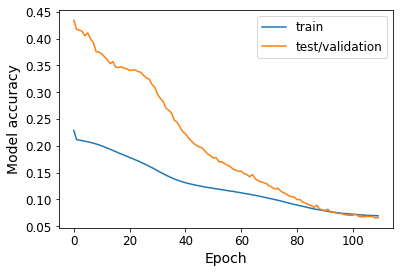

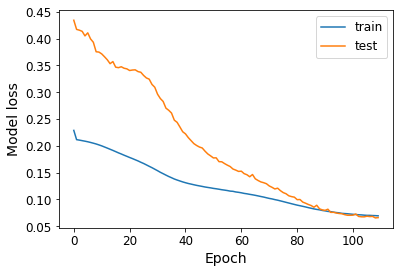

In [61]:
#evaluate model
score = model_sin.evaluate(np.array([x_predicted[:2000], y_predicted[:2000]]).transpose(),
                           z_valid, batch_size=100, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for mse
plt.plot(fit_sin.history['mean_squared_error'])
plt.plot(fit_sin.history['val_mean_squared_error'])  
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test/validation'])
plt.show()

# summarize history for loss
plt.plot(fit_sin.history['loss'])
plt.plot(fit_sin.history['val_loss'])
plt.ylabel('Model loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

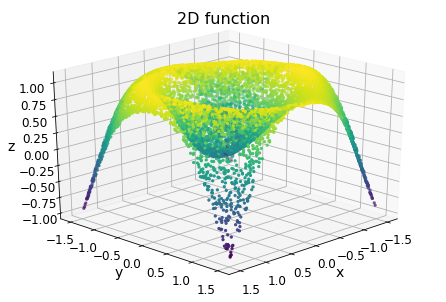

In [62]:
#plot predicted points
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=xyz[:,2], marker='.')
ax.view_init(azim=45, elev=25)
ax.set_title('2D function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [63]:
save_model_path='Saved_models/sin_final'
model_sin.save(filepath=save_model_path, include_optimizer=True)